## Quantum Search on Plaintext Data

In [13]:
from qiskit.visualization import plot_histogram
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit import *

In [14]:
qc=QuantumCircuit(3,3)
qc.h(range(3))

qc.z(range(3))
qc.cz(0,1)
qc.cz(0,2)
qc.cz(1,2)
qc.h(range(3))
qc.x(range(3))
qc.h(2)
#qc.ccx(0,1,2)

###########CCZ##############
qc.barrier()
qc.h(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.t(1)
qc.tdg(2)
qc.cx(0,2)
qc.cx(0,1)
qc.t(2)
qc.t(0)
qc.tdg(1)
qc.h(2)
qc.cx(0,1)
qc.barrier()


###############""
#qc.x(2)
#just replace ccx with
qc.h(2)
qc.x(2)
qc.h(2)
qc.x(1)
qc.h(1)
qc.x(0)
qc.h(0)

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)


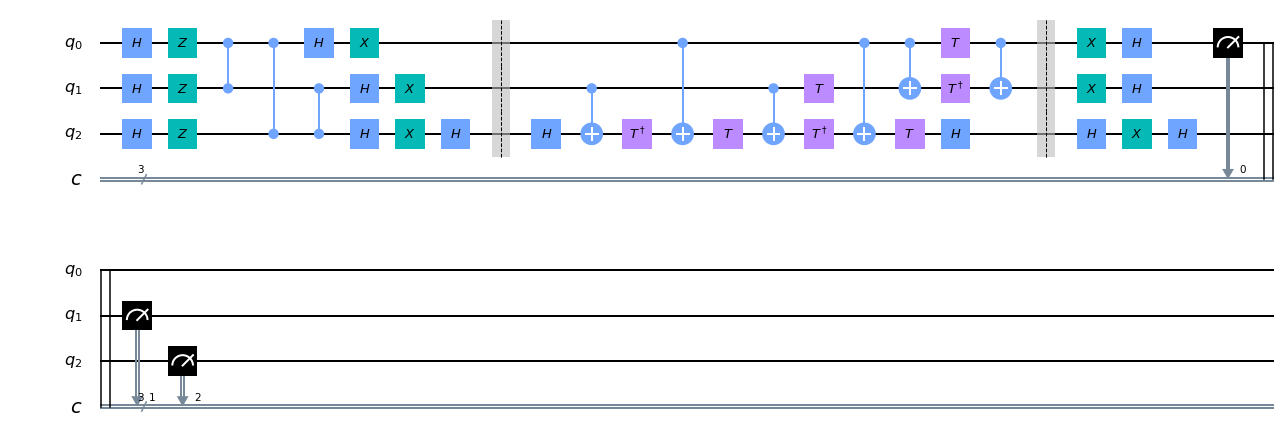

In [15]:
qc.draw(output='mpl')

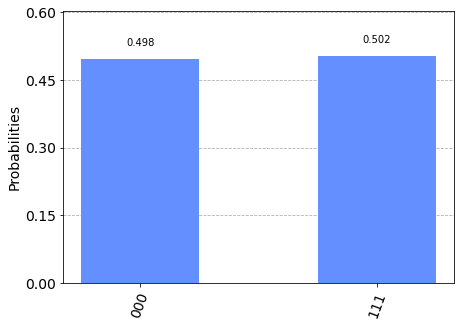

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1069
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
r=list(answer.keys())

plot_histogram(answer)

Voila ! we found the 000 and 111

## Quantum Search on Encrypted Data

In this section, we use exactly the same quantum circuit used previously but on encrypted data

#### Step 1: Import the library

In [17]:
import QuHE as qhe

#### Step 2: Define a ctx object

In this step, we need to define an encryption method, an choose a quantum homomorphic encryption scheme. We also need to provide random encryption keys that are private to the client. 

In [29]:
keys=[[1,1,0],[1,0,1]]
qc=QuantumCircuit(3,3)
ctx=qhe.Context(qc,keys,method='qotp',scheme='Liang')

#### Step 3: Encryption


In [30]:
ctx.add_H(range(3))
ctx.encrypt()

#### Step 4: Add your quantum gates and update the keys


Given the quantum gates, the client updates the encryption keys following the key update roles provided by the corresponding quantum homomorphic encryption scheme.

In [31]:

 
 #Grover's algorithm 
ctx.add_Z(range(3))
ctx.add_CZ(0,1)
ctx.update_cz(0,1)
ctx.add_CZ(0,2)
ctx.update_cz(0,2)
ctx.add_CZ(1,2)
ctx.update_cz(1,2)
ctx.add_H(range(3))
ctx.update_h(0)
ctx.update_h(1)
ctx.update_h(2)
ctx.add_X(range(3))
ctx.add_H(2) 
ctx.update_h(2)       
# Toffoli
qc.barrier()
ctx.add_H(2)
ctx.update_h(2)
ctx.add_CX(1,2)
ctx.update_cx(1)

#qc.tdg(2)
ctx.add_Tdg(2)
ctx.update_Tdg(2)

ctx.add_CX(0,2)
ctx.update_cx(0)

#qc.t(2)
ctx.add_T(2)
ctx.update_T(2)

ctx.add_CX(1,2)
ctx.update_cx(1)

#qc.t(1)
ctx.add_T(1)
ctx.update_T(1)

#qc.tdg(2)
ctx.add_Tdg(2)
ctx.update_Tdg(2)
ctx.add_CX(0,2)
ctx.update_cx(0)
ctx.add_CX(0,1)
ctx.update_cx(0)

#qc.t(2)
ctx.add_T(2)
ctx.update_T(2)
ctx.add_H(2)
ctx.update_h(2)

#qc.t(0)
ctx.add_T(0)
ctx.update_T(0)

#qc.tdg(1)
ctx.add_Tdg(1)
ctx.update_Tdg(1)
#ctx.add_H(2)
#ctx.update_h(2)
ctx.add_CX(0,1)
ctx.update_cx(0)
qc.barrier()

 
ctx.add_H(2)
ctx.update_h(2)
ctx.add_X(2)
ctx.add_H(2)
ctx.update_h(2)
ctx.add_X(1)
ctx.add_H(1)
ctx.update_h(1)
ctx.add_X(0)
ctx.add_H(0)
ctx.update_h(0)
 


x=ctx.decrypt()
print("############# Decryption #############",x)

#ctx.visualize()
 




       ┌───┐┌───┐┌───┐ ░ ┌───┐      ┌───┐┌───┐           ░                     »
  q_0: ┤ H ├┤ X ├┤ Z ├─░─┤ Z ├─■──■─┤ H ├┤ X ├───────────░─────────────────────»
       ├───┤├───┤└───┘ ░ ├───┤ │  │ └───┘├───┤┌───┐      ░                     »
  q_1: ┤ H ├┤ X ├──────░─┤ Z ├─■──┼───■──┤ H ├┤ X ├──────░────────■────────────»
       ├───┤├───┤      ░ ├───┤    │   │  ├───┤├───┤┌───┐ ░ ┌───┐┌─┴─┐┌─────┐   »
  q_2: ┤ H ├┤ Z ├──────░─┤ Z ├────■───■──┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ TDG ├─X─»
       └───┘├───┤      ░ └───┘           └───┘└───┘└───┘ ░ └───┘└───┘└─────┘ │ »
aux_0: ─|0>─┤ H ├──■─────────────────────────────────────────────────────────X─»
            └───┘┌─┴─┐                                                         »
aux_1: ─|0>──────┤ X ├─────────────────────────────────────────────────────────»
                 └───┘                                                         »
  c_0: ════════════════════════════════════════════════════════════════════════»
                            

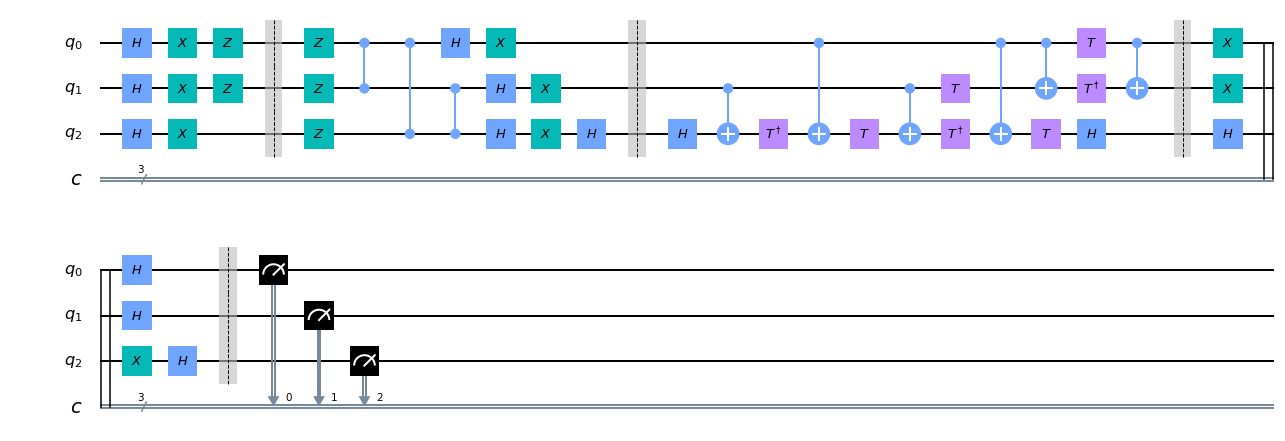

In [21]:
ctx.visualize()

We execute the same circuit. Here the quantum computer outputs '011' and '100' as results of the computation. 
The client decrypts the data using his private_key and obtains the states '111' and '000'.